In [2]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\singh\AppData\Local\Temp\ipykernel_15276\3860693547.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Get California Housign dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]

In [4]:
# Import Algorithm/ Estimator
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# Setup Random Seed

np.random.seed()

X = housing_df.drop("target", axis=1)
Y = housing_df["target"]  # Median House price in $100,000s

# Spliting to train test data sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed()

model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8033485287873668

In [6]:
y_preds = model.predict(X_test)

In [7]:
model.predict

<bound method ForestRegressor.predict of RandomForestRegressor()>

In [8]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_preds, Y_test)

0.33148597170542654

# Evaluating a machine learning model

Three Ways to evaluate scikit-learn models and estimators

1. Estimator's built in `score()` method
2. the `scoring` parameter
3. problem specific metric functions

learn more here https://scikit-learn.org/stable/modules/model_evaluation.html

In [9]:
df = pd.read_csv("./data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed()

X = df.drop("target",axis=1)
Y = df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=1000)

In [11]:
# Highest Value 1 and Lowest 0.0
clf.score(X_train,Y_train)

1.0

In [12]:
clf.score(X_test,Y_test)

0.7540983606557377

In [13]:
clf.predict_proba(X_test)

array([[0.812, 0.188],
       [0.524, 0.476],
       [0.936, 0.064],
       [0.543, 0.457],
       [0.187, 0.813],
       [0.96 , 0.04 ],
       [0.959, 0.041],
       [0.92 , 0.08 ],
       [0.556, 0.444],
       [0.13 , 0.87 ],
       [0.209, 0.791],
       [0.298, 0.702],
       [0.982, 0.018],
       [0.331, 0.669],
       [0.969, 0.031],
       [0.06 , 0.94 ],
       [0.879, 0.121],
       [0.39 , 0.61 ],
       [0.412, 0.588],
       [0.042, 0.958],
       [0.963, 0.037],
       [0.956, 0.044],
       [0.738, 0.262],
       [0.566, 0.434],
       [0.824, 0.176],
       [0.504, 0.496],
       [0.252, 0.748],
       [0.249, 0.751],
       [0.627, 0.373],
       [0.244, 0.756],
       [0.316, 0.684],
       [0.923, 0.077],
       [0.395, 0.605],
       [0.239, 0.761],
       [0.343, 0.657],
       [0.553, 0.447],
       [0.397, 0.603],
       [0.886, 0.114],
       [0.538, 0.462],
       [0.056, 0.944],
       [0.954, 0.046],
       [0.115, 0.885],
       [0.748, 0.252],
       [0.9

# Evaluating a model using `scoring` parameter

In [14]:
from sklearn.model_selection import cross_val_score

clf.score(X_test,Y_test)

0.7540983606557377

In [15]:
val_sc = cross_val_score(clf, X, Y, cv=10)

In [16]:
val_sc

array([0.90322581, 0.83870968, 0.83870968, 0.9       , 0.86666667,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [17]:
np.mean(val_sc)

0.8313978494623656

## Classification model evaluation metrices
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Reprort

In [18]:
np.mean(val_sc)

0.8313978494623656

In [19]:
print(f"Heart Diesease Classifier Accuracy : {np.mean(val_sc)*100:.2f}%")

Heart Diesease Classifier Accuracy : 83.14%


** Area under the reciver operating characterstic curve (AUC/ROC) curve **
- Area Under Curve (AUC)
- ROC Curve

In [20]:
from sklearn.metrics import roc_curve

y_pred =clf.predict_proba(X_test)

In [21]:
y_pred[:10], len(y_preds)

(array([[0.812, 0.188],
        [0.524, 0.476],
        [0.936, 0.064],
        [0.543, 0.457],
        [0.187, 0.813],
        [0.96 , 0.04 ],
        [0.959, 0.041],
        [0.92 , 0.08 ],
        [0.556, 0.444],
        [0.13 , 0.87 ]]),
 4128)

In [22]:
y_probs_positive = y_pred[:, 1]
y_probs_positive

array([0.188, 0.476, 0.064, 0.457, 0.813, 0.04 , 0.041, 0.08 , 0.444,
       0.87 , 0.791, 0.702, 0.018, 0.669, 0.031, 0.94 , 0.121, 0.61 ,
       0.588, 0.958, 0.037, 0.044, 0.262, 0.434, 0.176, 0.496, 0.748,
       0.751, 0.373, 0.756, 0.684, 0.077, 0.605, 0.761, 0.657, 0.447,
       0.603, 0.114, 0.462, 0.944, 0.046, 0.885, 0.252, 0.059, 0.081,
       0.994, 0.175, 0.62 , 0.617, 0.829, 0.581, 0.779, 0.787, 0.071,
       0.744, 0.71 , 0.983, 0.823, 0.904, 0.176, 0.04 ])

In [23]:
fpr,tpr,threshold = roc_curve(Y_test,y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.03030303, 0.03030303,
       0.06060606, 0.06060606, 0.09090909, 0.09090909, 0.18181818,
       0.18181818, 0.21212121, 0.21212121, 0.24242424, 0.24242424,
       0.27272727, 0.27272727, 0.33333333, 0.33333333, 0.36363636,
       0.36363636, 0.39393939, 0.39393939, 0.45454545, 0.51515152,
       0.66666667, 0.66666667, 0.84848485, 0.90909091, 1.        ])

In [24]:
def plt_roc_curve(fpr, tpr):
    fig, ax = plt.subplots()
    
    # Plotting the ROC curve
    ax.plot(fpr, tpr, color="orange", label="ROC Curve")
    
    # Plotting the diagonal line
    ax.plot([0, 1], [0, 1], color="darkblue", linestyle='--', label="Random Guess")
    
    # Labeling the axes
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    
    # Adding a title
    ax.set_title("ROC Curve")
    
    # Adding a legend to differentiate the curves
    ax.legend(loc="lower right")
    
    # Displaying the plot
    plt.show()

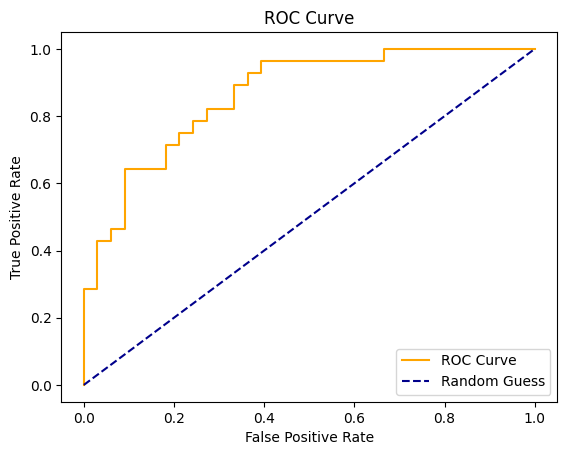

In [25]:
plt_roc_curve(fpr, tpr)

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,y_probs_positive)

0.8636363636363636

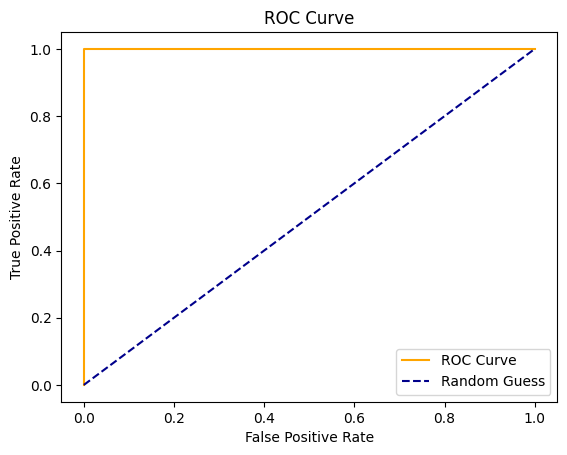

In [27]:
# Plot Perfect ROC curve and AUC score

fpr, tpr, th = roc_curve(Y_test, Y_test)
plt_roc_curve(fpr, tpr)

In [28]:
# perfect AUC score
roc_auc_score(Y_test,Y_test)

1.0

In [29]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed()

X = df.drop("target",axis=1)
Y = df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=1000)

# confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)



In [31]:
confusion_matrix(Y_test,y_pred)

array([[21,  5],
       [ 3, 32]], dtype=int64)

In [32]:
pd.crosstab(Y_test,y_pred ,rownames=["Actual Labels"],colnames=["Prdicted Labels"])

Prdicted Labels,0,1
Actual Labels,,
0,21,5
1,3,32


### Make confusion matrix more visual with seaborn's heartmap()

In [34]:
import seaborn as sns

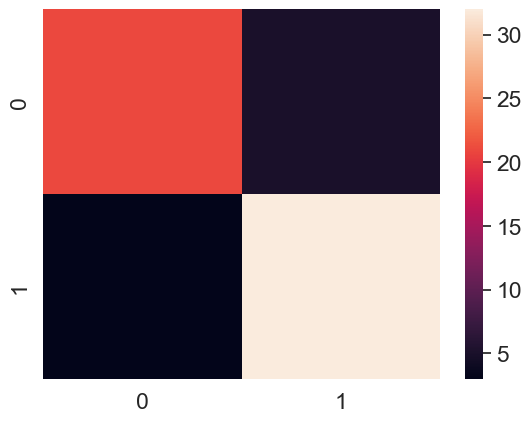

In [37]:
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(Y_test,y_pred)
sns.heatmap(conf_mat);

In [38]:
import sklearn

sklearn.__version__

'1.4.1.post1'

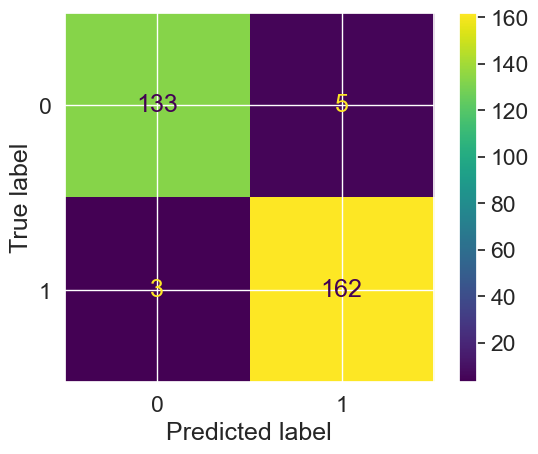

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=Y)

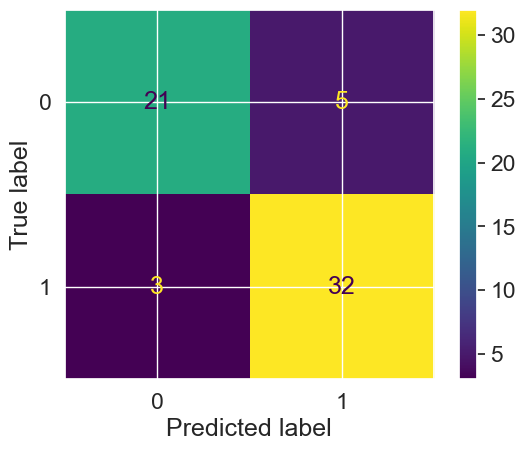

In [40]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

# Classification Report

In [41]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.86      0.91      0.89        35

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

